Cek informasi dataset

In [38]:
import pandas as pd

data = pd.read_csv('youtube-comments.csv')

data.head(2)

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2024-10-10T18:46:34Z,@RCTIENTERTAINMENT,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,4628.0
1,2024-10-10T19:11:28Z,@anggahardiansyah5628,Kesel ma wasit gua 😏,330.0


Cek Informasi Dataset

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13352 entries, 0 to 13351
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publishedAt        13352 non-null  object 
 1   authorDisplayName  13347 non-null  object 
 2   textDisplay        13343 non-null  object 
 3   likeCount          13339 non-null  float64
dtypes: float64(1), object(3)
memory usage: 417.4+ KB


STATISTIK DATASET

In [40]:
summary = data.describe()
summary.head()

,likeCount
count,13339.000000
mean,2.940700
std,73.056931
min,0.000000
25%,0.000000


ANALISIS

In [41]:
import pandas as pd

# Load the uploaded file
data = pd.read_csv('youtube-comments.csv')

# Display the first few rows and columns to check the structure of the data
data.head(), data.columns


(            publishedAt         authorDisplayName  \
 0  2024-10-10T18:46:34Z        @RCTIENTERTAINMENT   
 1  2024-10-10T19:11:28Z     @anggahardiansyah5628   
 2  2024-10-10T19:33:27Z  @NurFatimahAzzahraIsmail   
 3  2024-10-10T19:35:20Z          @yuditalanga5259   
 4  2024-10-10T19:35:30Z                   @AGSDOL   
 
                                          textDisplay  likeCount  
 0  Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...     4628.0  
 1                               Kesel ma wasit gua 😏      330.0  
 2                  Saitama lagi.....saitama lagi....      158.0  
 3                                        Wasit pendo        0.0  
 4                                            Cuk nan        0.0  ,
 Index(['publishedAt', 'authorDisplayName', 'textDisplay', 'likeCount'], dtype='object'))

VISUALISASI DATA ORIGINAL WORLDCLOUD DAN FREKUENSI KATA

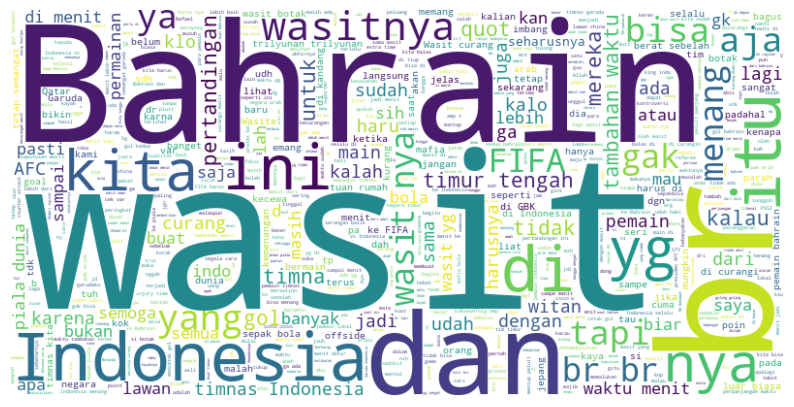

In [42]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Ensure there are no missing values in 'textDisplay' and concatenate into a single string
df = ' '.join(data['textDisplay'].dropna().tolist())

# Re-run with correct import
stopwords = set(STOPWORDS)
stopwords.update([
    "https", "youtube", "com", "watch", "v", "www", "http", "href", 
    "youtu", "be", "channel", "user", "video", "videos", "watching", "watched"
])

# Generate the word cloud
WC = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)
WC.generate(df)

# Visualize the word cloud
plt.figure(figsize=[10,10])
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()




Mengitung frrekuensi kata

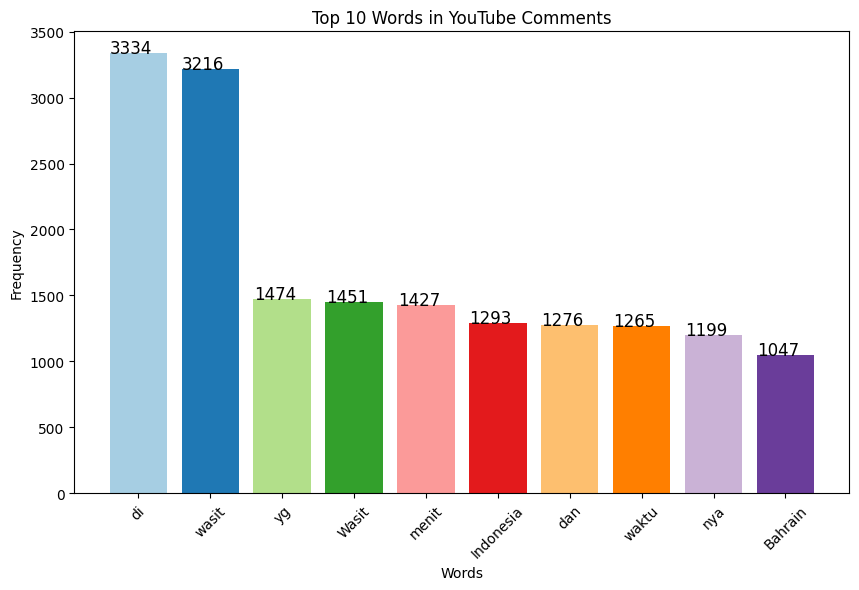

In [43]:
import pandas as pd
from collections import Counter
import re

# Load your data (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('youtube-comments.csv')

# Combine all text from 'textDisplay' column into one string
text = ' '.join(data['textDisplay'].dropna().tolist())

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in YouTube Comments')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), 
             fontsize=12, color='black', ha='center')
    
plt.show()



PRE-PROCESSING DATA

In [44]:
df = pd.DataFrame(data['textDisplay'])
df.head(1000)

,textDisplay
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...
1,Kesel ma wasit gua 😏
2,Saitama lagi.....saitama lagi....
3,Wasit pendo
4,Cuk nan
...,...
995,Wasit bayaran
996,Kami suporter indonesia marah tidak sudi memaa...
997,Bahraen curang dan licik takut dikalahkn oleh ...
998,yang salah 100% itu FIFA tidak bisa menggelar ...


In [45]:
import re
import string

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_angka(text):
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)
    return text

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Make sure 'textDisplay' is converted to string and missing values are handled
df['textDisplay'] = df['textDisplay'].astype(str)

df['cleaned_text'] = df['textDisplay'].apply(lambda x: remove_URL(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_html(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emoji(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_angka(x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_punct(x))

df.head(1000)


,textDisplay,cleaned_text
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...
1,Kesel ma wasit gua 😏,Kesel ma wasit gua
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi
3,Wasit pendo,Wasit pendo
4,Cuk nan,Cuk nan
...,...,...
995,Wasit bayaran,Wasit bayaran
996,Kami suporter indonesia marah tidak sudi memaa...,Kami suporter indonesia marah tidak sudi memaa...
997,Bahraen curang dan licik takut dikalahkn oleh ...,Bahraen curang dan licik takut dikalahkn oleh ...
998,yang salah 100% itu FIFA tidak bisa menggelar ...,yang salah itu FIFA tidak bisa menggelar pert...


In [46]:
#Case Folding dan Tokenization

df['Tokenization dan Case Folding'] = df['cleaned_text'].apply(lambda x: x.lower().split())
df.head(1000)

,textDisplay,cleaned_text,Tokenization dan Case Folding
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...,"[kesal, sedih, kecewa, jadi, satugimana, perta..."
1,Kesel ma wasit gua 😏,Kesel ma wasit gua,"[kesel, ma, wasit, gua]"
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi,"[saitama, lagisaitama, lagi]"
3,Wasit pendo,Wasit pendo,"[wasit, pendo]"
4,Cuk nan,Cuk nan,"[cuk, nan]"
...,...,...,...
995,Wasit bayaran,Wasit bayaran,"[wasit, bayaran]"
996,Kami suporter indonesia marah tidak sudi memaa...,Kami suporter indonesia marah tidak sudi memaa...,"[kami, suporter, indonesia, marah, tidak, sudi..."
997,Bahraen curang dan licik takut dikalahkn oleh ...,Bahraen curang dan licik takut dikalahkn oleh ...,"[bahraen, curang, dan, licik, takut, dikalahkn..."
998,yang salah 100% itu FIFA tidak bisa menggelar ...,yang salah itu FIFA tidak bisa menggelar pert...,"[yang, salah, itu, fifa, tidak, bisa, menggela..."


In [47]:
#Filtering atau Stopword Removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wahyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Filtering atau Stopword Removal'] = df['Tokenization dan Case Folding'].apply(lambda x: remove_stopwords(x))
df.head(1000)

,textDisplay,cleaned_text,Tokenization dan Case Folding,Filtering atau Stopword Removal
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...,"[kesal, sedih, kecewa, jadi, satugimana, perta...","[kesal, sedih, kecewa, satugimana, pertandingan]"
1,Kesel ma wasit gua 😏,Kesel ma wasit gua,"[kesel, ma, wasit, gua]","[kesel, ma, wasit, gua]"
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi,"[saitama, lagisaitama, lagi]","[saitama, lagisaitama]"
3,Wasit pendo,Wasit pendo,"[wasit, pendo]","[wasit, pendo]"
4,Cuk nan,Cuk nan,"[cuk, nan]","[cuk, nan]"
...,...,...,...,...
995,Wasit bayaran,Wasit bayaran,"[wasit, bayaran]","[wasit, bayaran]"
996,Kami suporter indonesia marah tidak sudi memaa...,Kami suporter indonesia marah tidak sudi memaa...,"[kami, suporter, indonesia, marah, tidak, sudi...","[suporter, indonesia, marah, sudi, memaafkan, ..."
997,Bahraen curang dan licik takut dikalahkn oleh ...,Bahraen curang dan licik takut dikalahkn oleh ...,"[bahraen, curang, dan, licik, takut, dikalahkn...","[bahraen, curang, licik, takut, dikalahkn, ind..."
998,yang salah 100% itu FIFA tidak bisa menggelar ...,yang salah itu FIFA tidak bisa menggelar pert...,"[yang, salah, itu, fifa, tidak, bisa, menggela...","[salah, fifa, menggelar, pertandingan, fair, m..."


In [49]:
#Stemming
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [53]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def Stemming(text):
    # Stem each word in the text
    return [stemmer.stem(word) for word in text]

# Apply the stemming function and join the stemmed words back into a string
df['stemming_data'] = df['Filtering atau Stopword Removal'].apply(lambda x: ' '.join(Stemming(x)))

# Display the first 411 rows
df.head(1000)


,textDisplay,cleaned_text,Tokenization dan Case Folding,Filtering atau Stopword Removal,stemming_data
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...,"[kesal, sedih, kecewa, jadi, satugimana, perta...","[kesal, sedih, kecewa, satugimana, pertandingan]",kesal sedih kecewa satugimana tanding
1,Kesel ma wasit gua 😏,Kesel ma wasit gua,"[kesel, ma, wasit, gua]","[kesel, ma, wasit, gua]",kesel ma wasit gua
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi,"[saitama, lagisaitama, lagi]","[saitama, lagisaitama]",saitama lagisaitama
3,Wasit pendo,Wasit pendo,"[wasit, pendo]","[wasit, pendo]",wasit pendo
4,Cuk nan,Cuk nan,"[cuk, nan]","[cuk, nan]",cuk nan
...,...,...,...,...,...
995,Wasit bayaran,Wasit bayaran,"[wasit, bayaran]","[wasit, bayaran]",wasit bayar
996,Kami suporter indonesia marah tidak sudi memaa...,Kami suporter indonesia marah tidak sudi memaa...,"[kami, suporter, indonesia, marah, tidak, sudi...","[suporter, indonesia, marah, sudi, memaafkan, ...",suporter indonesia marah sudi maaf wasit ahmed...
997,Bahraen curang dan licik takut dikalahkn oleh ...,Bahraen curang dan licik takut dikalahkn oleh ...,"[bahraen, curang, dan, licik, takut, dikalahkn...","[bahraen, curang, licik, takut, dikalahkn, ind...",bahraen curang licik takut dikalahkn indonesia...
998,yang salah 100% itu FIFA tidak bisa menggelar ...,yang salah itu FIFA tidak bisa menggelar pert...,"[yang, salah, itu, fifa, tidak, bisa, menggela...","[salah, fifa, menggelar, pertandingan, fair, m...",salah fifa gelar tanding fair selenggara piala...


In [56]:

df.drop_duplicates(subset=['stemming_data'], keep='first', inplace=True)
df.head(1000)

,textDisplay,cleaned_text,Tokenization dan Case Folding,Filtering atau Stopword Removal,stemming_data
0,Kesal Sedih kecewa jadi satu!!!<br>Gimana pert...,Kesal Sedih kecewa jadi satuGimana pertandinga...,"[kesal, sedih, kecewa, jadi, satugimana, perta...","[kesal, sedih, kecewa, satugimana, pertandingan]",kesal sedih kecewa satugimana tanding
1,Kesel ma wasit gua 😏,Kesel ma wasit gua,"[kesel, ma, wasit, gua]","[kesel, ma, wasit, gua]",kesel ma wasit gua
2,Saitama lagi.....saitama lagi....,Saitama lagisaitama lagi,"[saitama, lagisaitama, lagi]","[saitama, lagisaitama]",saitama lagisaitama
3,Wasit pendo,Wasit pendo,"[wasit, pendo]","[wasit, pendo]",wasit pendo
4,Cuk nan,Cuk nan,"[cuk, nan]","[cuk, nan]",cuk nan
...,...,...,...,...,...
1098,Seharusnya dimenit 97.11 saat bola keluar itu ...,Seharusnya dimenit saat bola keluar itu sudah...,"[seharusnya, dimenit, saat, bola, keluar, itu,...","[dimenit, bola, selesai, pertandingannya]",menit bola selesai tanding
1099,Hahaha bahrin g merinding emg klo nanti main d...,Hahaha bahrin g merinding emg klo nanti main d...,"[hahaha, bahrin, g, merinding, emg, klo, nanti...","[hahaha, bahrin, g, merinding, emg, klo, main,...",hahaha bahrin g merinding emg klo main gbk lia...
1100,"Mental pemain lokal buruk, witan menit akhir h...",Mental pemain lokal buruk witan menit akhir ha...,"[mental, pemain, lokal, buruk, witan, menit, a...","[mental, pemain, lokal, buruk, witan, menit, t...",mental main lokal buruk witan menit tenang oper
1101,stuju,stuju,[stuju],[stuju],stuju


SAVE DATASET

In [57]:
df.to_csv('preprocessed_youtube_comments.csv', index=False)

Visualisasi data

In [58]:
data = pd.read_csv('preprocessed_youtube_comments.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255 entries, 0 to 12254
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   textDisplay                      12254 non-null  object
 1   cleaned_text                     12253 non-null  object
 2   Tokenization dan Case Folding    12255 non-null  object
 3   Filtering atau Stopword Removal  12255 non-null  object
 4   stemming_data                    12253 non-null  object
dtypes: object(5)
memory usage: 478.8+ KB


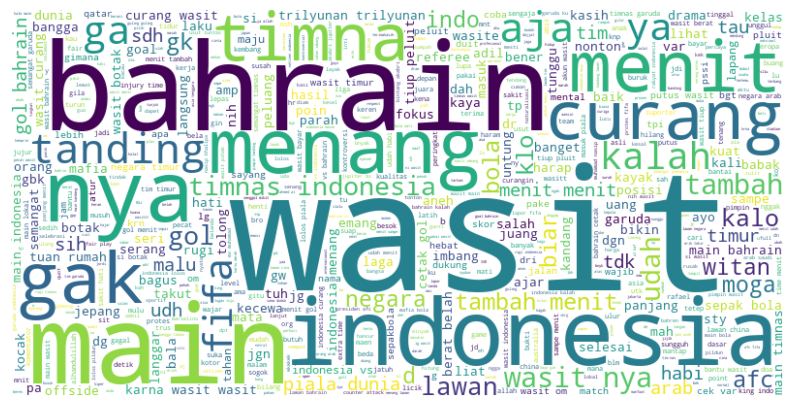

In [60]:
#Word Cloud

import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Ensure there are no missing values in 'textDisplay' and concatenate into a single string
df = ' '.join(data['stemming_data'].dropna().tolist())

# Re-run with correct import
stopwords = set(STOPWORDS)
stopwords.update([
    "https", "yg", "youtube", "com", "watch", "v", "www", "http", "href", 
    "youtu", "be", "channel", "user", "video", "videos", "watching", "watched"
])

# Generate the word cloud
WC = WordCloud(stopwords=stopwords, background_color="white", max_words=2000, width=800, height=400)
WC.generate(df)

# Visualize the word cloud
plt.figure(figsize=[10,10])
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()

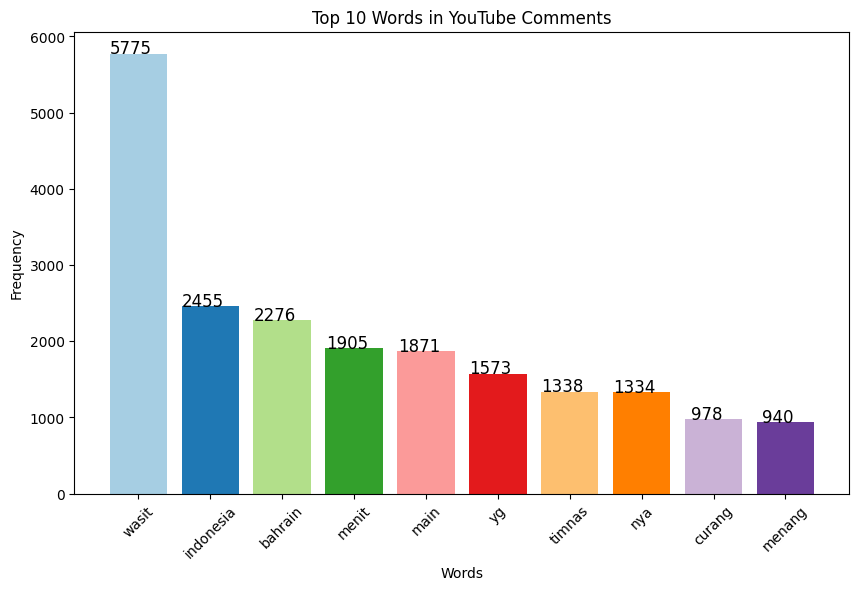

In [61]:
#   Top 10 Words in YouTube Comments
import pandas as pd
from collections import Counter
import re

# Load your data (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('preprocessed_youtube_comments.csv')

# Combine all text from 'textDisplay' column into one string
text = ' '.join(data['stemming_data'].dropna().tolist())

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in YouTube Comments')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), 
             fontsize=12, color='black', ha='center')
    
plt.show()
